In [23]:
import numpy as np

In [2]:
import os
mingw_path = 'C:\Program Files\mingw-w64\x86_64-6.3.0-posix-seh-rt_v5-rev2\mingw64\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [3]:
import tensorflow as tf
import sklearn
import xgboost as xgb

del train_y
del train_x
del test_x
del test_y

In [4]:
import pickle
train_x,train_y = pickle.load(open('datauint8.pkl','rb'))

In [5]:
len(train_x),len(train_y)

(10000, 10000)

In [6]:
from sklearn.cross_validation import train_test_split
train_x,test_x,train_y,test_y = train_test_split(train_x,train_y,test_size=0.2,random_state=1120)

In [6]:
# do not use this now, will cause future shuffle slow
#train_x = np.asarray(train_x,dtype=np.uint8)
#test_x = np.asarray(test_x,dtype=np.uint8)

In [7]:
len(train_x),len(train_y),test_x.shape,len(test_y)

AttributeError: 'list' object has no attribute 'shape'

In [11]:
import pickle
#pickle.dump((train_x,train_y),open('data.pkl','wb'))

In [12]:
import sys
sys.getsizeof(train_x[0]) * 10000

960000

In [13]:
len(train_x),test_x.shape

(8000, (2000, 612060))

In [8]:
train_y = [1 if i >= 20 else 0 for i in train_y  ]

In [9]:
test_y = [1 if i >= 20 else 0 for i in test_y  ]

# Logistic regression to split data as >= 20 and < 20

In [ ]:
# TODO use 100% data ,not 80% now
# iter 3000 test auc 0.71 still improving

weights_dic = {}

from sklearn.utils import shuffle
feed_size = 100
n_input = 101 * 101 * 60
X = tf.placeholder(tf.uint8,[None,n_input])
W = tf.Variable(tf.zeros([n_input,1]),tf.float32)
b = tf.Variable([0.0],tf.float32)
y = tf.sigmoid(tf.add(tf.matmul(tf.to_float(X),W),b))
y_ = tf.placeholder(tf.float32)
resm = tf.reduce_sum(tf.pow(tf.transpose(y) - y_,2))

val_train_size = 1000


debug_var = tf.log(tf.transpose(y))

max_ent =  - tf.reduce_sum(
    tf.reduce_sum(tf.multiply(y_,tf.log(tf.transpose(y))))
    + tf.reduce_sum(tf.multiply((1 - y_),tf.log(1 - tf.transpose(y))))
) 
#accuracy = 
#auc = tf.contrib.metrics.streaming_auc(, b)
#auc = tf.contrib.metrics.streaming_auc(tf.reshape(y_,[-1]), tf.reshape(y,[-1]))
auc = tf.metrics.auc(tf.reshape(y_,[-1]), tf.reshape(y,[-1]))


train_step = tf.train.AdamOptimizer(0.0000003).minimize(max_ent)
init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)
sess.run(tf.initialize_local_variables())

for i in range(4000):
    indexbegin = feed_size * i % len(train_y)
    #indexbegin = 0
    if i % (len(train_y) / (feed_size)) == 0:
        print("shuffleing ...")
        train_x,train_y = shuffle(train_x,train_y)
    batch_xs,batch_ys = np.asarray(train_x[indexbegin:indexbegin + feed_size],dtype=np.uint8),train_y[indexbegin:indexbegin + feed_size]
    if i % (len(train_y) / (feed_size * 2)) == 0:
        print('itertion %s' % (i),end=' ')
        curr_loss = sess.run(max_ent,feed_dict={X:train_x[:val_train_size],y_:train_y[:val_train_size]})
        print (curr_loss,end=" ")
        sysauc = sess.run(auc,feed_dict={X:test_x,y_:test_y})
        print (sysauc)
        #dv = sess.run(debug_var,feed_dict={X:train_x[:val_train_size],y_:train_y[:val_train_size]})
        #print (dv)
        #print ("train loss: %s" % (curr_loss),end=' ')
        #curr_loss = sess.run(real_resm,feed_dict={X:test_x,y_:test_y})
        #print ("test loss: %s" % (curr_loss),end=" ")
        #print(" check weights_dic[%s]" % (i),end=" ")
        #yy = sess.run(y,feed_dict={X:test_x})
        #print (yy[:2,0],end=" ")
        #debug_val = sess.run(debug_var,feed_dict={X:test_x,y_:test_y})
        weights_dic[i] = (sess.run(W),sess.run(b))
        #print("b: %s" % (weights_dic[i][1]))
    sess.run(train_step,feed_dict={X:batch_xs,y_:batch_ys})

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Instructions for updating:
Use `tf.local_variables_initializer` instead.
shuffleing ...
itertion 0 693.146 (0.0, 0.5)
itertion 40 656.117 (0.5, 0.55959266)
shuffleing ...
itertion 80 586.144 (0.55959266, 0.61323798)
itertion 120 551.246 (0.61323798, 0.63766861)
shuffleing ...
itertion 160 576.606 (0.63766861, 0.64245129)
itertion 200 638.061 (0.64245129, 0.64118272)
shuffleing ...
itertion 240 544.944 (0.64118272, 0.65306818)
itertion 280 563.815 (0.65306818, 0.65521824)
shuffleing ...
itertion 320 598.007 (0.65521824, 0.65608406)
itertion 360 465.461 (0.65608406, 0.66346192)
shuffleing ...
itertion 400 494.872 (0.66346192, 0.66928351)
itertion 440 553.856 (0.66928351, 0.6676082)
shuffleing ...
itertion 480 481.567 (0.6676082, 0.67257905)
itertion 520 466.14 (0.67257905, 0.67638451)
shuffleing ...
itertion 560 509.345 (0.67638451, 0.67667329)
itertion 600 439.857 (0.67667329, 0.68019283)
shuffleing ...
itertion 6

# tensorflow's linear regression

In [ ]:
tf.contrib.learn.LogisticRegressor

# Logistic regression with L2 regulation

In [32]:
# TODO use 100% data ,not 80% now
# iter 3000 test auc 0.71 still improving

weights_dic = {}

from sklearn.utils import shuffle
feed_size = 100
n_input = 101 * 101 * 60
X = tf.placeholder(tf.uint8,[None,n_input])
W = tf.Variable(tf.zeros([n_input,1]),tf.float32)
b = tf.Variable([0.0],tf.float32)
y = tf.sigmoid(tf.add(tf.matmul(tf.to_float(X),W),b))
y_ = tf.placeholder(tf.float32)
C = 1.0
resm = tf.reduce_sum(tf.pow(tf.transpose(y) - y_,2))

val_train_size = 1000


debug_var = tf.log(tf.transpose(y))

max_ent =  - C * tf.reduce_sum(
    tf.reduce_sum(tf.multiply(y_,tf.log(tf.transpose(y))))
    + tf.reduce_sum(tf.multiply((1 - y_),tf.log(1 - tf.transpose(y))))
) + tf.reduce_sum(tf.square(W)) / 2
#accuracy = 
#auc = tf.contrib.metrics.streaming_auc(, b)
#auc = tf.contrib.metrics.streaming_auc(tf.reshape(y_,[-1]), tf.reshape(y,[-1]))
auc = tf.metrics.auc(tf.reshape(y_,[-1]), tf.reshape(y,[-1]))


train_step = tf.train.AdamOptimizer(0.0000003).minimize(max_ent)
init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)
sess.run(tf.initialize_local_variables())

for i in range(4000):
    indexbegin = feed_size * i % len(train_y)
    #indexbegin = 0
    if i % (len(train_y) / (feed_size)) == 0:
        print("shuffleing ...")
        train_x,train_y = shuffle(train_x,train_y)
    batch_xs,batch_ys = np.asarray(train_x[indexbegin:indexbegin + feed_size],dtype=np.uint8),train_y[indexbegin:indexbegin + feed_size]
    if i % (len(train_y) / (feed_size * 2)) == 0:
        print('itertion %s' % (i),end=' ')
        curr_loss = sess.run(max_ent,feed_dict={X:train_x[:val_train_size],y_:train_y[:val_train_size]})
        print (curr_loss,end=" ")
        sysauc = sess.run(auc,feed_dict={X:test_x,y_:test_y})
        print (sysauc)
        pw = sess.run(W)
        print pw
        #dv = sess.run(debug_var,feed_dict={X:train_x[:val_train_size],y_:train_y[:val_train_size]})
        #print (dv)
        #print ("train loss: %s" % (curr_loss),end=' ')
        #curr_loss = sess.run(real_resm,feed_dict={X:test_x,y_:test_y})
        #print ("test loss: %s" % (curr_loss),end=" ")
        #print(" check weights_dic[%s]" % (i),end=" ")
        #yy = sess.run(y,feed_dict={X:test_x})
        #print (yy[:2,0],end=" ")
        #debug_val = sess.run(debug_var,feed_dict={X:test_x,y_:test_y})
        weights_dic[i] = (sess.run(W),sess.run(b))
        #print("b: %s" % (weights_dic[i][1]))
    sess.run(train_step,feed_dict={X:batch_xs,y_:batch_ys})

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Instructions for updating:
Use `tf.local_variables_initializer` instead.
shuffleing ...
itertion 0 693.146 (0.0, 0.5)
[[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
itertion 40 677.817 (0.5, 0.59133518)
[[  3.70351472e-07]
 [  4.14065170e-07]
 [  2.94666080e-07]
 ..., 
 [ -4.44581161e-07]
 [ -4.26739888e-07]
 [ -5.02523903e-07]]


KeyboardInterrupt: 

In [54]:
# TODO use 100% data ,not 80% now
# iter 3000 test auc 0.71 still improving

weights_dic = {}

from sklearn.utils import shuffle
feed_size = 100
n_input = 101 * 101 * 60
X = tf.placeholder(tf.uint8,[None,n_input])
W1 = tf.Variable(tf.random_normal([n_input,10],stddev=1.0/n_input),tf.float32)
W2 = tf.Variable(tf.random_normal([10,1],stddev=1.0/n_input),tf.float32)
b1 = tf.Variable(tf.zeros([10]),tf.float32)
b2 = tf.Variable([0.0],tf.float32)
y1 = tf.sigmoid(
    tf.add(tf.matmul(tf.to_float(X),W1),b1)
)
y = tf.sigmoid(
    tf.add(tf.matmul(tf.to_float(y1),W2),b2)
)
y_ = tf.placeholder(tf.float32)
C = 1.0
resm = tf.reduce_sum(tf.pow(tf.transpose(y) - y_,2))

val_train_size = 1000


debug_var = y1,y
max_ent =  - C * tf.reduce_sum(
    tf.reduce_sum(tf.multiply(y_,tf.log(tf.transpose(y))))
    + tf.reduce_sum(tf.multiply((1 - y_),tf.log(1 - tf.transpose(y))))
) 
#accuracy = 
#auc = tf.contrib.metrics.streaming_auc(, b)
#auc = tf.contrib.metrics.streaming_auc(tf.reshape(y_,[-1]), tf.reshape(y,[-1]))
auc = tf.metrics.auc(tf.reshape(y_,[-1]), tf.reshape(y,[-1]))


train_step = tf.train.AdamOptimizer(0.0000003).minimize(max_ent)
#train_step = tf.train.GradientDescentOptimizer(0.00003).minimize(max_ent)
init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)
sess.run(tf.initialize_local_variables())

for i in range(4000):
    indexbegin = feed_size * i % len(train_y)
    #indexbegin = 0
    if i % (len(train_y) / (feed_size)) == 0:
        print("shuffleing ...")
        train_x,train_y = shuffle(train_x,train_y)
    batch_xs,batch_ys = np.asarray(train_x[indexbegin:indexbegin + feed_size],dtype=np.uint8),train_y[indexbegin:indexbegin + feed_size]
    if i % (len(train_y) / (feed_size * 2)) == 0:
        print('itertion %s' % (i),end=' ')
        curr_loss = sess.run(max_ent,feed_dict={X:train_x[:val_train_size],y_:train_y[:val_train_size]})
        print (curr_loss,end=" ")
        sysauc = sess.run(auc,feed_dict={X:test_x,y_:test_y})
        print (sysauc)
        #dv = sess.run(debug_var,feed_dict={X:train_x[:val_train_size],y_:train_y[:val_train_size]})
        #print (dv)
        #print ("train loss: %s" % (curr_loss),end=' ')
        #curr_loss = sess.run(real_resm,feed_dict={X:test_x,y_:test_y})
        #print ("test loss: %s" % (curr_loss),end=" ")
        #print(" check weights_dic[%s]" % (i),end=" ")
        #yy = sess.run(y,feed_dict={X:test_x})
        #print (yy[:2,0],end=" ")
        debug_val = sess.run(debug_var,feed_dict={X:test_x,y_:test_y})
        print(debug_val)
        weights_dic[i] = (sess.run(W1),sess.run(W2),sess.run(b1),sess.run(b2))
        #print("b: %s" % (weights_dic[i][1]))
    sess.run(train_step,feed_dict={X:batch_xs,y_:batch_ys})

Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.local_variables_initializer` instead.


Instructions for updating:
Use `tf.local_variables_initializer` instead.


shuffleing ...
itertion 0 693.147 (0.0, 0.5)
(array([[ 0.5136044 ,  0.50802714,  0.49657726, ...,  0.52290815,
         0.52888525,  0.47885343],
       [ 0.57239354,  0.50408453,  0.54045767, ...,  0.52862555,
         0.49819279,  0.48902223],
       [ 0.54862732,  0.51271766,  0.50438553, ...,  0.53175998,
         0.50536907,  0.49551305],
       ..., 
       [ 0.55407554,  0.51917845,  0.49668944, ...,  0.5076161 ,
         0.52474838,  0.47016791],
       [ 0.5072298 ,  0.48702788,  0.50005656, ...,  0.52026439,
         0.53776526,  0.48651916],
       [ 0.51337868,  0.48788637,  0.51672179, ...,  0.50389409,
         0.49963972,  0.48899737]], dtype=float32), array([[ 0.49999905],
       [ 0.49999899],
       [ 0.49999905],
       ..., 
       [ 0.49999905],
       [ 0.49999905],
       [ 0.49999905]], dtype=float32))
itertion 40 693.138 (0.5, 0.5)
(array([[  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
          1.66973774e-19,   1.00000000e+00,   1.00000000e+00],


KeyboardInterrupt: 

In [10]:
onehoty = np.zeros([len(train_y),2])

In [11]:
for num,i in enumerate(train_y):
    onehoty[num][i] = 1

In [12]:
onehoty

array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       ..., 
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.]])

In [13]:
np.asarray(train_y).reshape([len(train_y),1])

array([[1],
       [1],
       [1],
       ..., 
       [0],
       [1],
       [0]])

In [14]:
train_x = np.asarray(train_x,dtype=np.uint8)

In [15]:
n_input = 101 * 101 * 60
feature_columns = [tf.contrib.layers.real_valued_column("x",dimension=n_input)]
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,hidden_units=[10],n_classes=2,model_dir="model_dir")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_max': 5, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001C67BA78EB8>, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_task_type': None, '_tf_random_seed': None, '_save_checkpoints_secs': 600, '_task_id': 0, '_environment': 'local', '_num_ps_replicas': 0, '_save_summary_steps': 100, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_evaluation_master': '', '_master': '', '_save_checkpoints_steps': None}


In [16]:
input_fn = tf.contrib.learn.io.numpy_input_fn({"x":train_x},np.asarray(train_y).reshape([len(train_y)]),batch_size=100,num_epochs=1000)

In [22]:
for i in range(100):
    classifier.fit(input_fn=input_fn, steps=1)
    auc_score = classifier.evaluate(x=test_x,y=np.asarray(test_y).reshape([len(test_y)]))["auc"]
    print ("auc: %s" % (auc_score))

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 2745 into model_dir\model.ckpt.
INFO:tensorflow:step = 2745, loss = 0.673018
INFO:tensorflow:Loss for final step: 0.673018.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
ava

C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py:247: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


ValueError: Features are incompatible with given information. Given features: Tensor("input:0", shape=(?, 612060), dtype=uint8), required signatures: {'x': TensorSignature(dtype=tf.uint8, shape=TensorShape([Dimension(None), Dimension(612060)]), is_sparse=False)}.

# keras logistic model

In [148]:
# keras simple dnn model
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.initializers import Zeros

model = Sequential()
#model.add(Dense(32,input_shape=(n_input,)))
#model.add(Activation('relu'))
#model.add(Dense(2,))
#model.add(Activation('softmax'))
model.add(Dense(1,activation=Activation('sigmoid'),input_shape=(n_input,),kernel_initializer=Zeros(),bias_initializer=Zeros()))

In [160]:
from keras import optimizers
from keras import losses
model.compile(optimizer=optimizers.SGD(0.000000001),
              loss=losses.binary_crossentropy,
              metrics=['accuracy'])


In [164]:
model.fit(train_x[:1000,:],train_y[:1000],epochs=3,batch_size=100)

Epoch 1/3
1000/1000 [==============================] - 3s - loss: 0.6062 - acc: 0.6680     
Epoch 2/3
1000/1000 [==============================] - 3s - loss: 0.6046 - acc: 0.6730     
Epoch 3/3
1000/1000 [==============================] - 3s - loss: 0.6024 - acc: 0.6830     


In [165]:
denselayer = model.get_layer("Dense",1)
denselayer.get_weights()

[array([[ -4.28051505e-09],
        [  1.29339801e-08],
        [ -2.76458012e-09],
        ..., 
        [ -8.41064391e-08],
        [ -9.81695223e-08],
        [ -1.15521466e-07]], dtype=float32),
 array([  2.37839926e-09], dtype=float32)]

In [166]:
from sklearn.metrics import roc_curve, auc,roc_auc_score
y_pred = model.predict_proba(test_x)
print (roc_auc_score(test_y, y_pred[:,0]))
print (y_pred)

2000/2000 [==============================] - 6s     
0.652727233207
[[ 0.35454312]
 [ 0.40631643]
 [ 0.383625  ]
 ..., 
 [ 0.50460935]
 [ 0.25425366]
 [ 0.40119845]]


# keras neural network

In [212]:
# keras simple dnn model
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.initializers import Zeros
from keras.initializers import RandomNormal

model = Sequential()
model.add(Dense(32,input_shape=(n_input,)))
model.add(Activation('sigmoid'))
#model.add(Dense(2,))
#model.add(Activation('softmax'))
model.add(Dense(1,activation=Activation('sigmoid')))

In [213]:
from keras import optimizers
from keras import losses
model.compile(optimizer=optimizers.Adam(0.000001),
              loss=losses.binary_crossentropy,
              metrics=['accuracy'])


In [216]:
model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=100,batch_size=100)
#model.fit(train_x,train_y,epochs=3,batch_size=100)

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 113s - loss: 0.5805 - acc: 0.6975 - val_loss: 0.6249 - val_acc: 0.6445
Epoch 2/100
4100/8000 [==============>...............] - ETA: 51s - loss: 0.5816 - acc: 0.6956

KeyboardInterrupt: 

[array([[  2.61578988e-03,   4.31450790e-05,  -1.07274123e-03, ...,
         -2.41255411e-03,  -1.12752779e-03,  -1.77984429e-03],
       [  1.24636665e-03,  -1.08006503e-03,   4.19366552e-04, ...,
         -2.32193107e-03,   2.47841864e-03,   3.00782296e-04],
       [ -2.76038633e-03,   6.22449967e-04,  -1.95119798e-03, ...,
          6.67266315e-04,   1.28507393e-03,   1.50949706e-03],
       ..., 
       [  2.19647284e-03,   1.25725835e-03,  -2.87730154e-03, ...,
          6.32804236e-04,   3.03505966e-03,  -1.75152894e-03],
       [ -1.34491804e-03,   1.47229829e-03,   1.52007164e-03, ...,
         -1.52969663e-03,  -3.16242658e-04,  -1.12127780e-03],
       [ -2.53355969e-03,  -9.65016254e-04,   9.57014254e-06, ...,
         -1.95050577e-03,   7.20960030e-04,   8.64711474e-04]], dtype=float32), array([ -3.29610120e-05,   6.87132269e-05,   2.66756379e-05,
        -2.58741729e-05,   2.27163218e-06,  -2.94978163e-05,
         2.24443393e-05,   1.25335109e-05,  -5.00098213e-05,
      

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C9085FC6A0>]], dtype=object)

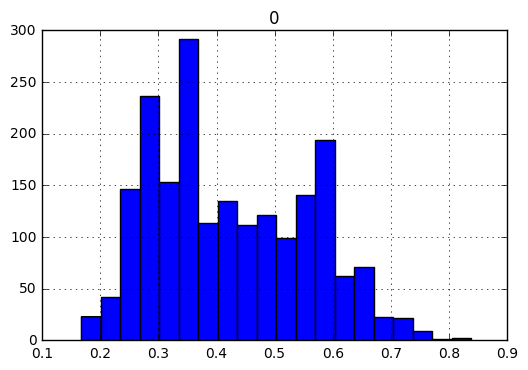

In [257]:
denselayer = model.get_layer("Dense",1)
print (denselayer.get_weights())
from sklearn.metrics import roc_curve, auc,roc_auc_score
y_pred = model.predict_proba(test_x)
print (roc_auc_score(test_y, y_pred[:,0]))
print (y_pred)
%matplotlib inline
import pandas as pd
pd.DataFrame( y_pred[:,0]).hist(bins=20)

[0.3232036074894618, 0.21713557494363298, 0.25232820311734144, 0.13812371336143514]
[array([ 63.94422115]), array([ 74.31771395]), array([ 72.36486619]), array([ 70.52671307])]
[array([ 51.87548648]), array([ 51.00001758]), array([ 50.16668615]), array([ 39.07233152])]


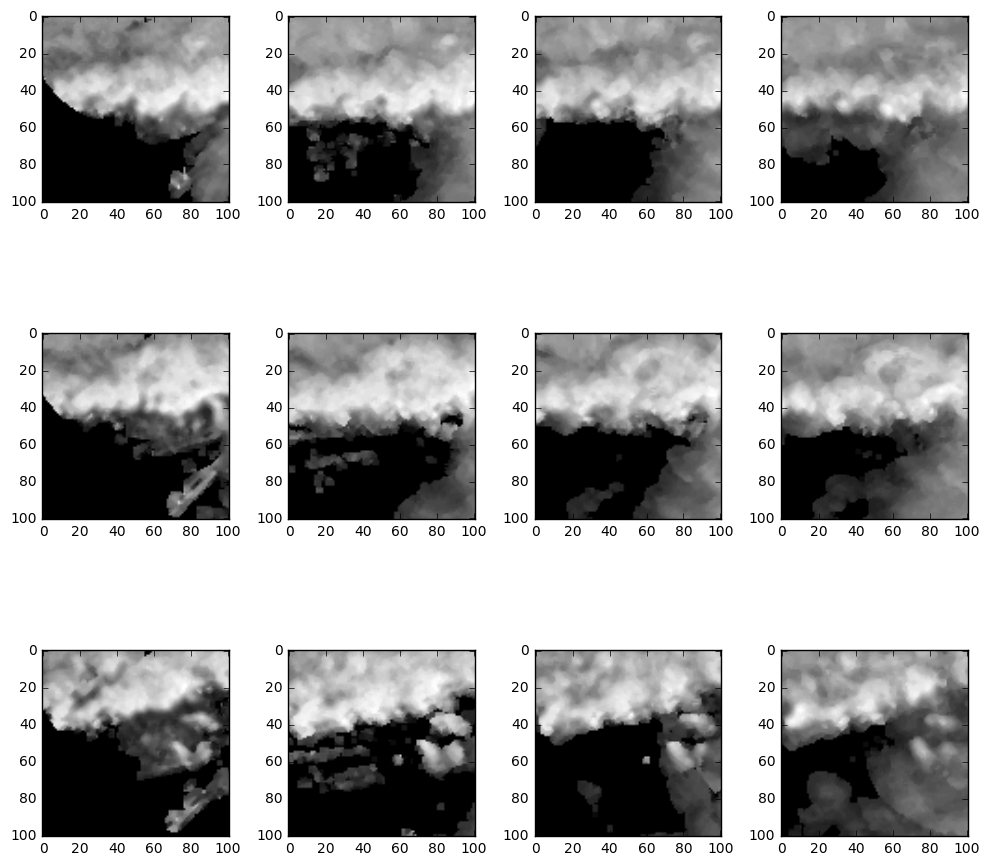

29.9


In [131]:
train_x[0].reshape([15,4,101,101])[0][0]
from matplotlib import pyplot as plt
%matplotlib inline
#index = 100
index += 1

print (
    [float(sum(train_x[index].reshape([15,4,101,101])[14][i].reshape(-1) == 0)) / (101*101) for i in range(4)]
)
print (
    [np.average(train_x[index].reshape([15,4,101,101])[14][i]).reshape(-1) for i in range(4)]
)
print (
    [np.std(train_x[index].reshape([15,4,101,101])[14][i]).reshape(-1) for i in range(4)]
)
plt.figure(figsize=(10,10))
f,axarr = plt.subplots(3,4,figsize=(10,10))
for j in range(3):
    for i in range(4):
        #plt.subplot(340 + j * 4 + i + 1)
        axarr[j][i].imshow(train_x[index].reshape([15,4,101,101])[14-5*j][i],cmap='gray')
f.tight_layout()
plt.show()
print (train_y[index])

# try to do some feature engineer

In [7]:
[np.average(train_x[0].reshape([15,4,101,101])[0][0].reshape(-1)) for i in range(4)]


[25.484462307616901,
 25.484462307616901,
 25.484462307616901,
 25.484462307616901]

In [8]:
gap = 50
np.average(train_x[0].reshape([15,4,101,101])[0][0][50-gap:50+gap +  1,50-gap:50+gap + 1].reshape(-1))

25.484462307616901

In [230]:
list(range(14,0,-5))

[14, 9, 4]

In [6]:
import pandas as pd
class RainFallFeatures():
    def __init__(self):
        self.gaps = [1,5,10,20,50]
        self.heightvalues = [0,1,2,3]
        self.timatange = list(range(14,0,-5))
        
    def fit_and_extrace(self,tx):
        featurepandas = []
        for funs in (i  for i in dir(self) if i[:3] == 'fe_'):
             featurepandas.append(pd.DataFrame(getattr(self, funs)(tx,funs)))
        return pd.concat(featurepandas,axis=1)
    
    def fe_avg(self,tx,feature_prefix):
        feature_dic = {}
        for gap in self.gaps:
            for heights in self.heightvalues:
                for timetag in self.timatange:
                    featurename = "%s_%s_%s_%s" % (feature_prefix,gap,heights,timetag)
                    print("extracing %s" % (featurename),end=" ")
                    features = [
                        np.average(item.reshape([15,4,101,101])[timetag][heights][50 - gap:51 + gap,50 - gap:51 + gap].reshape(-1))
                        for item in tx
                    ]
                    feature_dic[featurename] = features
        print()
        return feature_dic
    
    def fe_std(self,tx,feature_prefix):
        feature_dic = {}
        for gap in self.gaps:
            for heights in self.heightvalues:
                for timetag in self.timatange:
                    featurename = "%s_%s_%s_%s" % (feature_prefix,gap,heights,timetag)
                    print("extracing %s" % (featurename),end=" ")
                    features = [
                        np.std(item.reshape([15,4,101,101])[timetag][heights][50 - gap:51 + gap,50 - gap:51 + gap].reshape(-1))
                        for item in tx
                    ]
                    feature_dic[featurename] = features
        print()
        return feature_dic
    
    def fe_avg_without_zero(self,tx,feature_prefix):
        feature_dic = {}
        for gap in self.gaps:
            for heights in self.heightvalues:
                for timetag in self.timatange:
                    featurename = "%s_%s_%s_%s" % (feature_prefix,gap,heights,timetag)
                    print("extracing %s" % (featurename),end=" ")
                    def getnonzero(inputarr):
                        return inputarr[inputarr.nonzero()]
                    features = [
                        np.average(
                            getnonzero(
                                item.reshape([15,4,101,101])[timetag][heights][50 - gap:51 + gap,50 - gap:51 + gap].reshape(-1)
                            )
                        )
                        for item in tx
                    ]
                    feature_dic[featurename] = features
        print()
        return feature_dic
    
    def fe_std_without_zero(self,tx,feature_prefix):
        feature_dic = {}
        for gap in self.gaps:
            for heights in self.heightvalues:
                for timetag in self.timatange:
                    featurename = "%s_%s_%s_%s" % (feature_prefix,gap,heights,timetag)
                    print("extracing %s" % (featurename),end=" ")
                    def getnonzero(inputarr):
                        return inputarr[inputarr.nonzero()]
                    features = [
                        np.std(
                            getnonzero(
                                item.reshape([15,4,101,101])[timetag][heights][50 - gap:51 + gap,50 - gap:51 + gap].reshape(-1)
                            )
                        )
                        for item in tx
                    ]
                    feature_dic[featurename] = features
        print()
        return feature_dic
    
    def fe_zero_ratio(self,tx,feature_prefix):
        feature_dic = {}
        for gap in self.gaps:
            for heights in self.heightvalues:
                for timetag in self.timatange:
                    featurename = "%s_%s_%s_%s" % (feature_prefix,gap,heights,timetag)
                    print("extracing %s" % (featurename),end=" ")
                    features = [
                        np.average(item.reshape([15,4,101,101])[timetag][heights][50 - gap:51 + gap,50 - gap:51 + gap].reshape(-1) == 0)
                        for item in tx
                    ]
                    feature_dic[featurename] = features
        print()
        return feature_dic
    
    def fe_zero_ratio(self,tx,feature_prefix):
        feature_dic = {}
        for gap in self.gaps:
            for heights in self.heightvalues:
                for timetag in self.timatange:
                    featurename = "%s_%s_%s_%s" % (feature_prefix,gap,heights,timetag)
                    print("extracing %s" % (featurename),end=" ")
                    features = [
                        np.average(item.reshape([15,4,101,101])[timetag][heights][50 - gap:51 + gap,50 - gap:51 + gap].reshape(-1) == 0)
                        for item in tx
                    ]
                    feature_dic[featurename] = features
        print()
        return feature_dic
    
    def fe_gt50_ratio(self,tx,feature_prefix):
        feature_dic = {}
        for gap in self.gaps:
            for heights in self.heightvalues:
                for timetag in self.timatange:
                    featurename = "%s_%s_%s_%s" % (feature_prefix,gap,heights,timetag)
                    print("extracing %s" % (featurename),end=" ")
                    features = [
                        np.average(item.reshape([15,4,101,101])[timetag][heights][50 - gap:51 + gap,50 - gap:51 + gap].reshape(-1) >= 50)
                        for item in tx
                    ]
                    feature_dic[featurename] = features
        print()
        return feature_dic
    
    def fe_gt100_ratio(self,tx,feature_prefix):
        feature_dic = {}
        for gap in self.gaps:
            for heights in self.heightvalues:
                for timetag in self.timatange:
                    featurename = "%s_%s_%s_%s" % (feature_prefix,gap,heights,timetag)
                    print("extracing %s" % (featurename),end=" ")
                    features = [
                        np.average(item.reshape([15,4,101,101])[timetag][heights][50 - gap:51 + gap,50 - gap:51 + gap].reshape(-1) >= 100)
                        for item in tx
                    ]
                    feature_dic[featurename] = features
        print()
        return feature_dic
    
    def fe_gt150_ratio(self,tx,feature_prefix):
        feature_dic = {}
        for gap in self.gaps:
            for heights in self.heightvalues:
                for timetag in self.timatange:
                    featurename = "%s_%s_%s_%s" % (feature_prefix,gap,heights,timetag)
                    print("extracing %s" % (featurename),end=" ")
                    features = [
                        np.average(item.reshape([15,4,101,101])[timetag][heights][50 - gap:51 + gap,50 - gap:51 + gap].reshape(-1) >= 100)
                        for item in tx
                    ]
                    feature_dic[featurename] = features
        print()
        return feature_dic
    
    def fe_gt200_ratio(self,tx,feature_prefix):
        feature_dic = {}
        for gap in self.gaps:
            for heights in self.heightvalues:
                for timetag in self.timatange:
                    featurename = "%s_%s_%s_%s" % (feature_prefix,gap,heights,timetag)
                    print("extracing %s" % (featurename),end=" ")
                    features = [
                        np.average(item.reshape([15,4,101,101])[timetag][heights][50 - gap:51 + gap,50 - gap:51 + gap].reshape(-1) >= 200)
                        for item in tx
                    ]
                    feature_dic[featurename] = features
        print()
        return feature_dic
    
    def fe_max(self,tx,feature_prefix):
        feature_dic = {}
        for gap in self.gaps:
            for heights in self.heightvalues:
                for timetag in self.timatange:
                    featurename = "%s_%s_%s_%s" % (feature_prefix,gap,heights,timetag)
                    print("extracing %s" % (featurename),end=" ")
                    features = [
                        np.max(item.reshape([15,4,101,101])[timetag][heights][50 - gap:51 + gap,50 - gap:51 + gap].reshape(-1) == 0)
                        for item in tx
                    ]
                    feature_dic[featurename] = features
        print()
        return feature_dic
    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016C8C6CF748>]], dtype=object)

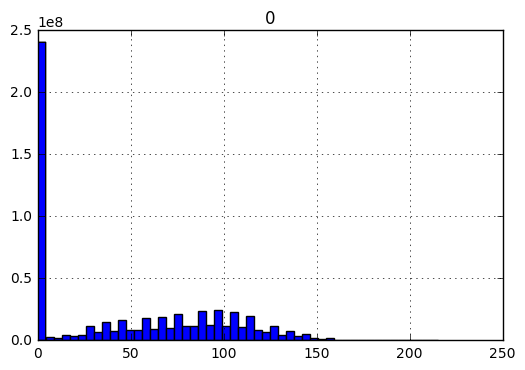

In [267]:
%matplotlib inline
#pd.DataFrame(np.asarray(train_x[:1000]).reshape(-1)).hist(bins=50)

In [7]:
rf = RainFallFeatures()
result = rf.fit_and_extrace(train_x)

extracing fe_avg_1_0_14 extracing fe_avg_1_0_9 extracing fe_avg_1_0_4 extracing fe_avg_1_1_14 extracing fe_avg_1_1_9 extracing fe_avg_1_1_4 extracing fe_avg_1_2_14 extracing fe_avg_1_2_9 extracing fe_avg_1_2_4 extracing fe_avg_1_3_14 extracing fe_avg_1_3_9 extracing fe_avg_1_3_4 extracing fe_avg_5_0_14 extracing fe_avg_5_0_9 extracing fe_avg_5_0_4 extracing fe_avg_5_1_14 extracing fe_avg_5_1_9 extracing fe_avg_5_1_4 extracing fe_avg_5_2_14 extracing fe_avg_5_2_9 extracing fe_avg_5_2_4 extracing fe_avg_5_3_14 extracing fe_avg_5_3_9 extracing fe_avg_5_3_4 extracing fe_avg_10_0_14 extracing fe_avg_10_0_9 extracing fe_avg_10_0_4 extracing fe_avg_10_1_14 extracing fe_avg_10_1_9 extracing fe_avg_10_1_4 extracing fe_avg_10_2_14 extracing fe_avg_10_2_9 extracing fe_avg_10_2_4 extracing fe_avg_10_3_14 extracing fe_avg_10_3_9 extracing fe_avg_10_3_4 extracing fe_avg_20_0_14 extracing fe_avg_20_0_9 extracing fe_avg_20_0_4 extracing fe_avg_20_1_14 extracing fe_avg_20_1_9 extracing fe_avg_20_1_4 ex

C:\Program Files\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


extracing fe_avg_without_zero_1_0_4 extracing fe_avg_without_zero_1_1_14 extracing fe_avg_without_zero_1_1_9 extracing fe_avg_without_zero_1_1_4 extracing fe_avg_without_zero_1_2_14 extracing fe_avg_without_zero_1_2_9 extracing fe_avg_without_zero_1_2_4 extracing fe_avg_without_zero_1_3_14 extracing fe_avg_without_zero_1_3_9 extracing fe_avg_without_zero_1_3_4 extracing fe_avg_without_zero_5_0_14 extracing fe_avg_without_zero_5_0_9 extracing fe_avg_without_zero_5_0_4 extracing fe_avg_without_zero_5_1_14 extracing fe_avg_without_zero_5_1_9 extracing fe_avg_without_zero_5_1_4 extracing fe_avg_without_zero_5_2_14 extracing fe_avg_without_zero_5_2_9 extracing fe_avg_without_zero_5_2_4 extracing fe_avg_without_zero_5_3_14 extracing fe_avg_without_zero_5_3_9 extracing fe_avg_without_zero_5_3_4 extracing fe_avg_without_zero_10_0_14 extracing fe_avg_without_zero_10_0_9 extracing fe_avg_without_zero_10_0_4 extracing fe_avg_without_zero_10_1_14 extracing fe_avg_without_zero_10_1_9 extracing fe_a

C:\Program Files\Anaconda3\lib\site-packages\numpy\core\_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


extracing fe_std_without_zero_1_0_9 extracing fe_std_without_zero_1_0_4 extracing fe_std_without_zero_1_1_14 extracing fe_std_without_zero_1_1_9 extracing fe_std_without_zero_1_1_4 extracing fe_std_without_zero_1_2_14 extracing fe_std_without_zero_1_2_9 extracing fe_std_without_zero_1_2_4 extracing fe_std_without_zero_1_3_14 extracing fe_std_without_zero_1_3_9 extracing fe_std_without_zero_1_3_4 extracing fe_std_without_zero_5_0_14 extracing fe_std_without_zero_5_0_9 extracing fe_std_without_zero_5_0_4 extracing fe_std_without_zero_5_1_14 extracing fe_std_without_zero_5_1_9 extracing fe_std_without_zero_5_1_4 extracing fe_std_without_zero_5_2_14 extracing fe_std_without_zero_5_2_9 extracing fe_std_without_zero_5_2_4 extracing fe_std_without_zero_5_3_14 extracing fe_std_without_zero_5_3_9 extracing fe_std_without_zero_5_3_4 extracing fe_std_without_zero_10_0_14 extracing fe_std_without_zero_10_0_9 extracing fe_std_without_zero_10_0_4 extracing fe_std_without_zero_10_1_14 extracing fe_st

In [8]:
result = pd.DataFrame(result)

In [9]:
result.shape

(10000, 600)

In [10]:
result

,fe_avg_10_0_14,fe_avg_10_0_4,fe_avg_10_0_9,fe_avg_10_1_14,fe_avg_10_1_4,fe_avg_10_1_9,fe_avg_10_2_14,fe_avg_10_2_4,fe_avg_10_2_9,fe_avg_10_3_14,...,fe_zero_ratio_5_0_9,fe_zero_ratio_5_1_14,fe_zero_ratio_5_1_4,fe_zero_ratio_5_1_9,fe_zero_ratio_5_2_14,fe_zero_ratio_5_2_4,fe_zero_ratio_5_2_9,fe_zero_ratio_5_3_14,fe_zero_ratio_5_3_4,fe_zero_ratio_5_3_9
0,95.816327,138.884354,98.115646,105.510204,138.129252,125.312925,101.680272,125.952381,105.414966,84.945578,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,91.244898,126.272109,134.272109,115.897959,136.040816,142.931973,107.448980,126.244898,136.088435,90.734694,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,143.292517,24.725624,123.698413,143.945578,9.612245,120.353741,135.346939,16.947846,118.312925,117.816327,...,0.000000,0.000000,0.867769,0.000000,0.000000,0.743802,0.000000,0.000000,0.016529,0.000000
3,105.380952,2.238095,0.920635,128.102041,0.702948,14.158730,119.666667,0.000000,20.310658,95.312925,...,1.000000,0.000000,1.000000,0.867769,0.000000,1.000000,0.752066,0.000000,0.561983,0.041322
4,94.117914,111.861678,122.614512,109.809524,126.768707,144.272109,99.748299,120.931973,138.428571,87.408163,...,0.008264,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,10.514739,0.897959,7.181406,55.795918,2.891156,4.258503,52.138322,0.000000,0.136054,76.503401,...,0.900826,0.000000,0.966942,0.776860,0.000000,1.000000,1.000000,0.000000,0.958678,0.000000
6,43.936508,21.170068,51.739229,118.503401,49.739229,138.625850,105.469388,78.054422,137.149660,79.217687,...,0.669421,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,5.154195,0.000000,2.569161,142.761905,14.167800,83.269841,130.693878,59.514739,95.054422,101.360544,...,0.900826,0.000000,0.826446,0.024793,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,95.027211,95.038549,139.639456,126.448980,102.020408,151.911565,117.360544,89.462585,143.414966,100.258503,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,56.741497,1.049887,22.546485,130.755102,25.287982,73.759637,123.102041,12.015873,66.049887,114.986395,...,0.776860,0.000000,0.338843,0.000000,0.000000,0.628099,0.000000,0.000000,0.000000,0.000000


In [115]:
train_labels = [1 if i >= 20 else 0 for i in train_y]

In [116]:
len(train_y),len(test_y)

(8000, 2000)

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(max_depth=11)
clf.fit(result.values,train_labels)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=11, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [119]:
param = {
    'max_depth':11, 
    'eta':0.06, 
    'silent':1, 
    'objective':'binary:logistic',
    'eval_metric':'auc',
    'subsample':0.85,
    'colsample_bytree':0.45,
    #'min_child_weight':50,
    'seed':1123,
    'nthread':-1,
    
}
num_round = 4000
dtrain = xgb.DMatrix(result.values,train_labels)
dtest = xgb.DMatrix(test_data,test_label)
#bst = xgb.train(param,dtrain,
#                evals_result={'testset':dtest},
#                num_boost_round=num_round,
#                verbose_eval=10,
#                )
#bst = xgb.XGBClassifier()
bst = xgb.train(param,dtrain,
                evals=[(dtrain,'trainset'),(dtest,'testset')],
                num_boost_round=num_round,
                verbose_eval=20,early_stopping_rounds=50
               )

[0]	trainset-auc:0.909649	testset-auc:0.726234
Multiple eval metrics have been passed: 'testset-auc' will be used for early stopping.

Will train until testset-auc hasn't improved in 50 rounds.
[20]	trainset-auc:0.997748	testset-auc:0.860039
[40]	trainset-auc:0.999806	testset-auc:0.872011
[60]	trainset-auc:0.999982	testset-auc:0.876981
[80]	trainset-auc:0.999999	testset-auc:0.88144
[100]	trainset-auc:1	testset-auc:0.885054
[120]	trainset-auc:1	testset-auc:0.886289
[140]	trainset-auc:1	testset-auc:0.888034
[160]	trainset-auc:1	testset-auc:0.889595
[180]	trainset-auc:1	testset-auc:0.890478
[200]	trainset-auc:1	testset-auc:0.890949
[220]	trainset-auc:1	testset-auc:0.891512
[240]	trainset-auc:1	testset-auc:0.891756
[260]	trainset-auc:1	testset-auc:0.891918
[280]	trainset-auc:1	testset-auc:0.892258
[300]	trainset-auc:1	testset-auc:0.891766
[320]	trainset-auc:1	testset-auc:0.892133
[340]	trainset-auc:1	testset-auc:0.891976
[360]	trainset-auc:1	testset-auc:0.892408
[380]	trainset-auc:1	testse

In [118]:
test_data = rf.fit_and_extrace(test_x).values

extracing fe_avg_1_0_14 extracing fe_avg_1_0_9 extracing fe_avg_1_0_4 extracing fe_avg_1_1_14 extracing fe_avg_1_1_9 extracing fe_avg_1_1_4 extracing fe_avg_1_2_14 extracing fe_avg_1_2_9 extracing fe_avg_1_2_4 extracing fe_avg_1_3_14 extracing fe_avg_1_3_9 extracing fe_avg_1_3_4 extracing fe_avg_5_0_14 extracing fe_avg_5_0_9 extracing fe_avg_5_0_4 extracing fe_avg_5_1_14 extracing fe_avg_5_1_9 extracing fe_avg_5_1_4 extracing fe_avg_5_2_14 extracing fe_avg_5_2_9 extracing fe_avg_5_2_4 extracing fe_avg_5_3_14 extracing fe_avg_5_3_9 extracing fe_avg_5_3_4 extracing fe_avg_10_0_14 extracing fe_avg_10_0_9 extracing fe_avg_10_0_4 extracing fe_avg_10_1_14 extracing fe_avg_10_1_9 extracing fe_avg_10_1_4 extracing fe_avg_10_2_14 extracing fe_avg_10_2_9 extracing fe_avg_10_2_4 extracing fe_avg_10_3_14 extracing fe_avg_10_3_9 extracing fe_avg_10_3_4 extracing fe_avg_20_0_14 extracing fe_avg_20_0_9 extracing fe_avg_20_0_4 extracing fe_avg_20_1_14 extracing fe_avg_20_1_9 extracing fe_avg_20_1_4 ex

C:\Program Files\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


extracing fe_avg_without_zero_1_0_4 extracing fe_avg_without_zero_1_1_14 extracing fe_avg_without_zero_1_1_9 extracing fe_avg_without_zero_1_1_4 extracing fe_avg_without_zero_1_2_14 extracing fe_avg_without_zero_1_2_9 extracing fe_avg_without_zero_1_2_4 extracing fe_avg_without_zero_1_3_14 extracing fe_avg_without_zero_1_3_9 extracing fe_avg_without_zero_1_3_4 extracing fe_avg_without_zero_5_0_14 extracing fe_avg_without_zero_5_0_9 extracing fe_avg_without_zero_5_0_4 extracing fe_avg_without_zero_5_1_14 extracing fe_avg_without_zero_5_1_9 extracing fe_avg_without_zero_5_1_4 extracing fe_avg_without_zero_5_2_14 extracing fe_avg_without_zero_5_2_9 extracing fe_avg_without_zero_5_2_4 extracing fe_avg_without_zero_5_3_14 extracing fe_avg_without_zero_5_3_9 extracing fe_avg_without_zero_5_3_4 extracing fe_avg_without_zero_10_0_14 extracing fe_avg_without_zero_10_0_9 extracing fe_avg_without_zero_10_0_4 extracing fe_avg_without_zero_10_1_14 extracing fe_avg_without_zero_10_1_9 extracing fe_a

C:\Program Files\Anaconda3\lib\site-packages\numpy\core\_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


extracing fe_std_without_zero_1_1_9 extracing fe_std_without_zero_1_1_4 extracing fe_std_without_zero_1_2_14 extracing fe_std_without_zero_1_2_9 extracing fe_std_without_zero_1_2_4 extracing fe_std_without_zero_1_3_14 extracing fe_std_without_zero_1_3_9 extracing fe_std_without_zero_1_3_4 extracing fe_std_without_zero_5_0_14 extracing fe_std_without_zero_5_0_9 extracing fe_std_without_zero_5_0_4 extracing fe_std_without_zero_5_1_14 extracing fe_std_without_zero_5_1_9 extracing fe_std_without_zero_5_1_4 extracing fe_std_without_zero_5_2_14 extracing fe_std_without_zero_5_2_9 extracing fe_std_without_zero_5_2_4 extracing fe_std_without_zero_5_3_14 extracing fe_std_without_zero_5_3_9 extracing fe_std_without_zero_5_3_4 extracing fe_std_without_zero_10_0_14 extracing fe_std_without_zero_10_0_9 extracing fe_std_without_zero_10_0_4 extracing fe_std_without_zero_10_1_14 extracing fe_std_without_zero_10_1_9 extracing fe_std_without_zero_10_1_4 extracing fe_std_without_zero_10_2_14 extracing fe

In [17]:
predy = clf.predict_proba(test_data)[:,1]

In [75]:
xgb_predy = bst.predict(xgb.DMatrix(test_data))

In [76]:
test_label = [1 if i >= 20 else 0 for i in test_y]

In [77]:
from sklearn.metrics import roc_curve, auc,roc_auc_score
auc = roc_auc_score(test_label,predy)
print (auc)

0.88543529743


In [78]:
# xgb auc
from sklearn.metrics import roc_curve, auc,roc_auc_score
auc = roc_auc_score(test_label,xgb_predy)
print (auc)

0.893216746158


In [81]:
yy = clf.predict(test_data)

In [82]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_label,yy))
print(accuracy_score(train_labels,clf.predict(result.values)))

0.8225
1.0


In [86]:
xgbpredict = bst.predict(xgb.DMatrix(test_data))
xgbpredict = [1 if i > 0.5 else 0 for i in xgbpredict]

In [93]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_label,yy))
print(accuracy_score(test_label,xgbpredict))

0.8225
0.829


In [122]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(max_depth=11)
reg.fit(result.values,train_y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [120]:
param = {
    'max_depth':11, 
    'eta':0.06, 
    'silent':1, 
    'objective':'reg:linear',
    'eval_metric':'rmse',
    'subsample':0.85,
    'colsample_bytree':0.45,
    #'min_child_weight':50,
    'seed':1123,
    'nthread':-1,
    
}
num_round = 4000
dtrain = xgb.DMatrix(result.values,train_y)
dtest = xgb.DMatrix(test_data,test_y)
#bst = xgb.train(param,dtrain,
#                evals_result={'testset':dtest},
#                num_boost_round=num_round,
#                verbose_eval=10,
#                )
#bst = xgb.XGBClassifier()
bst = xgb.train(param,dtrain,
                evals=[(dtrain,'trainset'),(dtest,'testset')],
                num_boost_round=num_round,
                verbose_eval=20,early_stopping_rounds=50
               )

[0]	trainset-rmse:20.7761	testset-rmse:21.5201
Multiple eval metrics have been passed: 'testset-rmse' will be used for early stopping.

Will train until testset-rmse hasn't improved in 50 rounds.
[20]	trainset-rmse:9.38605	testset-rmse:13.5594
[40]	trainset-rmse:5.36719	testset-rmse:12.0473
[60]	trainset-rmse:3.64257	testset-rmse:11.7041
[80]	trainset-rmse:2.66995	testset-rmse:11.5634
[100]	trainset-rmse:2.10267	testset-rmse:11.4802
[120]	trainset-rmse:1.70883	testset-rmse:11.442
[140]	trainset-rmse:1.3837	testset-rmse:11.4147
[160]	trainset-rmse:1.08292	testset-rmse:11.3838
[180]	trainset-rmse:0.858483	testset-rmse:11.3651
[200]	trainset-rmse:0.672654	testset-rmse:11.3554
[220]	trainset-rmse:0.546797	testset-rmse:11.3481
[240]	trainset-rmse:0.43974	testset-rmse:11.3426
[260]	trainset-rmse:0.343865	testset-rmse:11.3376
[280]	trainset-rmse:0.275571	testset-rmse:11.3358
[300]	trainset-rmse:0.220118	testset-rmse:11.333
[320]	trainset-rmse:0.178055	testset-rmse:11.332
[340]	trainset-rmse:0

In [14]:
param = {
    'max_depth':11, 
    'eta':0.06, 
    'silent':1, 
    'objective':'reg:linear',
    'eval_metric':'rmse',
    'subsample':0.85,
    'colsample_bytree':0.45,
    #'min_child_weight':50,
    'seed':1123,
    'nthread':-1,
    
}
num_round = 1080
dtrain = xgb.DMatrix(result.values,train_y)
#bst = xgb.train(param,dtrain,
#                evals_result={'testset':dtest},
#                num_boost_round=num_round,
#                verbose_eval=10,
#                )
#bst = xgb.XGBClassifier()
bst = xgb.train(param,dtrain,
                evals=[(dtrain,'trainset')],
                num_boost_round=num_round,
                verbose_eval=20,early_stopping_rounds=50
               )

[0]	trainset-rmse:20.8981
Will train until trainset-rmse hasn't improved in 50 rounds.
[20]	trainset-rmse:9.67028
[40]	trainset-rmse:5.68382
[60]	trainset-rmse:3.87606
[80]	trainset-rmse:3.07732
[100]	trainset-rmse:2.43053
[120]	trainset-rmse:1.9814
[140]	trainset-rmse:1.62417
[160]	trainset-rmse:1.33983
[180]	trainset-rmse:1.09867
[200]	trainset-rmse:0.919959
[220]	trainset-rmse:0.772268
[240]	trainset-rmse:0.618871
[260]	trainset-rmse:0.507119
[280]	trainset-rmse:0.424567
[300]	trainset-rmse:0.350699
[320]	trainset-rmse:0.291127
[340]	trainset-rmse:0.238366
[360]	trainset-rmse:0.199141
[380]	trainset-rmse:0.168448
[400]	trainset-rmse:0.141749
[420]	trainset-rmse:0.120765
[440]	trainset-rmse:0.102921
[460]	trainset-rmse:0.08513
[480]	trainset-rmse:0.070936
[500]	trainset-rmse:0.061431
[520]	trainset-rmse:0.052551
[540]	trainset-rmse:0.044004
[560]	trainset-rmse:0.03795
[580]	trainset-rmse:0.032952
[600]	trainset-rmse:0.028094
[620]	trainset-rmse:0.02366
[640]	trainset-rmse:0.020599
[6

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A1D7034A8>]], dtype=object)

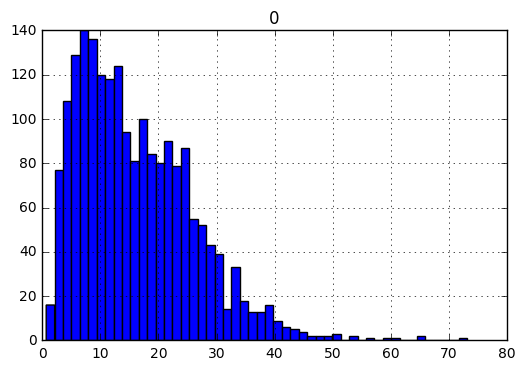

In [123]:
%matplotlib inline
from matplotlib import pyplot as plt
#plt.subplot(121)
#pd.DataFrame(reg.predict(test_data)).hist(bins=50)
#plt.subplot(122)
pd.DataFrame(bst.predict(xgb.DMatrix(test_data))).hist(bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A1A487C88>]], dtype=object)

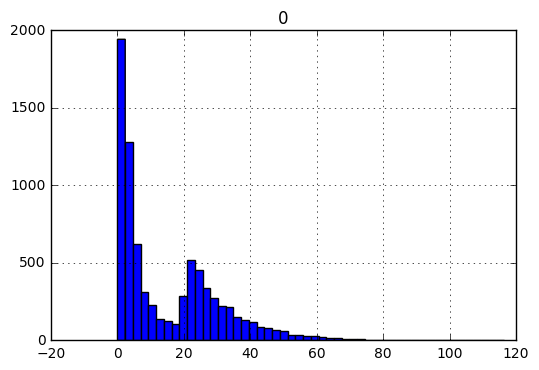

In [124]:
#pd.DataFrame(reg.predict(result.values)).hist(bins=50)
pd.DataFrame(bst.predict(xgb.DMatrix(result.values))).hist(bins=50)

In [77]:
regyy = reg.predict(test_data)
print("rsem")
np.sqrt(np.mean(np.square(np.array(regyy) - np.array(test_y))))

rsem


11.858509993785722

In [15]:
predict_x = []
count = 0
with open('CIKM2017_testA/testA.txt') as fhdl:
    for line in fhdl:
        count += 1
        if count % 50 == 0:
            print (float(count) / 10000,end=' '),
        linenum,label,datas = line.strip().split(',')
        label = float(label)
        datas = np.asarray(datas.split(" "),dtype=np.int)
        datas[datas < 0] = 0
        datas = np.asarray(datas,dtype=np.uint8)
        predict_x.append(datas)
        


0.005 0.01 0.015 0.02 0.025 0.03 0.035 0.04 0.045 0.05 0.055 0.06 0.065 0.07 0.075 0.08 0.085 0.09 0.095 0.1 0.105 0.11 0.115 0.12 0.125 0.13 0.135 0.14 0.145 0.15 0.155 0.16 0.165 0.17 0.175 0.18 0.185 0.19 0.195 0.2 

In [125]:
with open('onlinedata.plk','rb') as fhdl:
    predict_x = pickle.load(fhdl)

Exception ignored in: <bound method Booster.__del__ of <xgboost.core.Booster object at 0x0000021A2441E828>>
Traceback (most recent call last):
  File "C:\Program Files\Anaconda3\lib\site-packages\xgboost-0.6-py3.5.egg\xgboost\core.py", line 669, in __del__
    _LIB.XGBoosterFree(self.handle)
AttributeError: 'Booster' object has no attribute 'handle'


In [16]:
# to make sure online data is the right version(contains values larger than 128)
predict_x[0][predict_x[0] > 128]

array([131, 131, 131, ..., 137, 131, 131], dtype=uint8)

In [17]:
predictdata = rf.fit_and_extrace(predict_x)

extracing fe_avg_1_0_14 extracing fe_avg_1_0_9 extracing fe_avg_1_0_4 extracing fe_avg_1_1_14 extracing fe_avg_1_1_9 extracing fe_avg_1_1_4 extracing fe_avg_1_2_14 extracing fe_avg_1_2_9 extracing fe_avg_1_2_4 extracing fe_avg_1_3_14 extracing fe_avg_1_3_9 extracing fe_avg_1_3_4 extracing fe_avg_5_0_14 extracing fe_avg_5_0_9 extracing fe_avg_5_0_4 extracing fe_avg_5_1_14 extracing fe_avg_5_1_9 extracing fe_avg_5_1_4 extracing fe_avg_5_2_14 extracing fe_avg_5_2_9 extracing fe_avg_5_2_4 extracing fe_avg_5_3_14 extracing fe_avg_5_3_9 extracing fe_avg_5_3_4 extracing fe_avg_10_0_14 extracing fe_avg_10_0_9 extracing fe_avg_10_0_4 extracing fe_avg_10_1_14 extracing fe_avg_10_1_9 extracing fe_avg_10_1_4 extracing fe_avg_10_2_14 extracing fe_avg_10_2_9 extracing fe_avg_10_2_4 extracing fe_avg_10_3_14 extracing fe_avg_10_3_9 extracing fe_avg_10_3_4 extracing fe_avg_20_0_14 extracing fe_avg_20_0_9 extracing fe_avg_20_0_4 extracing fe_avg_20_1_14 extracing fe_avg_20_1_9 extracing fe_avg_20_1_4 ex

C:\Program Files\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


extracing fe_avg_without_zero_1_2_14 extracing fe_avg_without_zero_1_2_9 extracing fe_avg_without_zero_1_2_4 extracing fe_avg_without_zero_1_3_14 extracing fe_avg_without_zero_1_3_9 extracing fe_avg_without_zero_1_3_4 extracing fe_avg_without_zero_5_0_14 extracing fe_avg_without_zero_5_0_9 extracing fe_avg_without_zero_5_0_4 extracing fe_avg_without_zero_5_1_14 extracing fe_avg_without_zero_5_1_9 extracing fe_avg_without_zero_5_1_4 extracing fe_avg_without_zero_5_2_14 extracing fe_avg_without_zero_5_2_9 extracing fe_avg_without_zero_5_2_4 extracing fe_avg_without_zero_5_3_14 extracing fe_avg_without_zero_5_3_9 extracing fe_avg_without_zero_5_3_4 extracing fe_avg_without_zero_10_0_14 extracing fe_avg_without_zero_10_0_9 extracing fe_avg_without_zero_10_0_4 extracing fe_avg_without_zero_10_1_14 extracing fe_avg_without_zero_10_1_9 extracing fe_avg_without_zero_10_1_4 extracing fe_avg_without_zero_10_2_14 extracing fe_avg_without_zero_10_2_9 extracing fe_avg_without_zero_10_2_4 extracing 

C:\Program Files\Anaconda3\lib\site-packages\numpy\core\_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


extracing fe_std_without_zero_1_1_4 extracing fe_std_without_zero_1_2_14 extracing fe_std_without_zero_1_2_9 extracing fe_std_without_zero_1_2_4 extracing fe_std_without_zero_1_3_14 extracing fe_std_without_zero_1_3_9 extracing fe_std_without_zero_1_3_4 extracing fe_std_without_zero_5_0_14 extracing fe_std_without_zero_5_0_9 extracing fe_std_without_zero_5_0_4 extracing fe_std_without_zero_5_1_14 extracing fe_std_without_zero_5_1_9 extracing fe_std_without_zero_5_1_4 extracing fe_std_without_zero_5_2_14 extracing fe_std_without_zero_5_2_9 extracing fe_std_without_zero_5_2_4 extracing fe_std_without_zero_5_3_14 extracing fe_std_without_zero_5_3_9 extracing fe_std_without_zero_5_3_4 extracing fe_std_without_zero_10_0_14 extracing fe_std_without_zero_10_0_9 extracing fe_std_without_zero_10_0_4 extracing fe_std_without_zero_10_1_14 extracing fe_std_without_zero_10_1_9 extracing fe_std_without_zero_10_1_4 extracing fe_std_without_zero_10_2_14 extracing fe_std_without_zero_10_2_9 extracing f

In [18]:
predictvals = bst.predict(xgb.DMatrix(predictdata.values))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EC07324588>]], dtype=object)

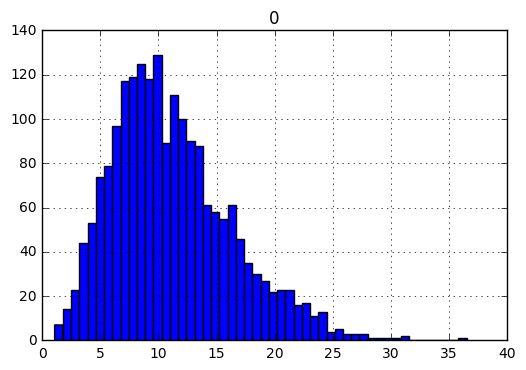

In [20]:
%matplotlib inline
pd.DataFrame(predictvals).hist(bins=50)

In [21]:
np.average(predictvals)

11.163013

In [37]:
np.average(reg.predict(test_data))

16.345297149742326

In [38]:
np.average(train_y)

15.472075

In [22]:
with open('answers/4_20_xgboost_deep11_alldata.csv','w') as whdl:
    for val in predictvals:
        whdl.write("%s\n" % (val))

In [371]:
sum(np.array(predictvals) < 0)


2

# try to find out what's going on in online dataset

[0.8940299970591119, 0.039996078815802374, 0.025193608469757867, 0.0]
[array([ 6.32104696]), array([ 87.08371728]), array([ 88.08175669]), array([ 81.15341633])]
[array([ 21.60333777]), array([ 30.57163218]), array([ 26.30296332]), array([ 12.83622377])]


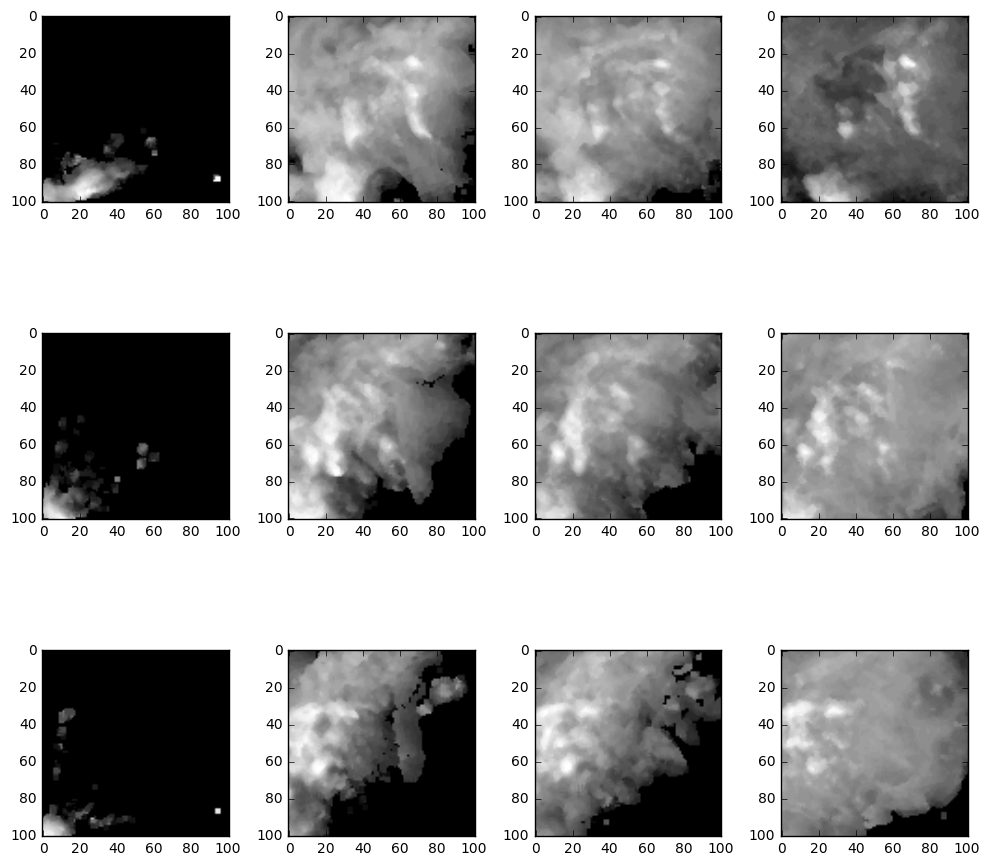

In [381]:

predict_x[0].reshape([15,4,101,101])[0][0]
from matplotlib import pyplot as plt
%matplotlib inline
#index = 100
index += 1

print (
    [float(sum(predict_x[index].reshape([15,4,101,101])[14][i].reshape(-1) == 0)) / (101*101) for i in range(4)]
)
print (
    [np.average(predict_x[index].reshape([15,4,101,101])[14][i]).reshape(-1) for i in range(4)]
)
print (
    [np.std(predict_x[index].reshape([15,4,101,101])[14][i]).reshape(-1) for i in range(4)]
)
plt.figure(figsize=(10,10))
f,axarr = plt.subplots(3,4,figsize=(10,10))
for j in range(3):
    for i in range(4):
        #plt.subplot(340 + j * 4 + i + 1)
        axarr[j][i].imshow(predict_x[index].reshape([15,4,101,101])[14-5*j][i],cmap='gray')
f.tight_layout()
plt.show()